In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


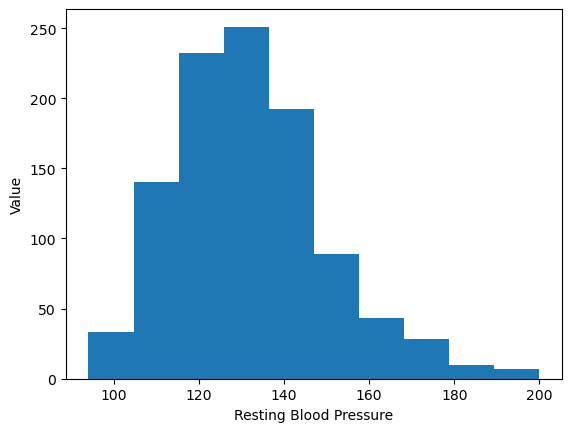

In [6]:
plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

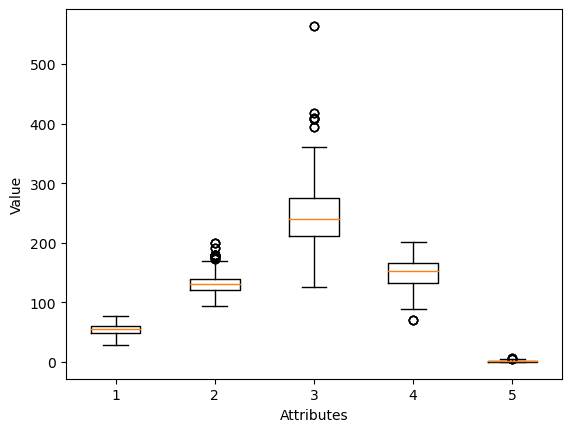

In [7]:
data_to_boxplot = [df['age'], df['trestbps'], df['chol'], 
df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [8]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
training_points = df.drop(columns=['target'])
training_labels = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    training_points, 
    training_labels, 
    test_size=0.3, 
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [10]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 1]
[[115  41]
 [ 35 117]]
0.7532467532467533


[0.9772727272727273, 0.9318181818181818, 0.8668831168831169, 0.814935064935065, 0.7532467532467533, 0.7402597402597403, 0.7305194805194806, 0.7142857142857143, 0.7175324675324676, 0.7435064935064936, 0.7337662337662337, 0.75, 0.7207792207792207, 0.7175324675324676, 0.711038961038961, 0.7077922077922078, 0.698051948051948, 0.698051948051948, 0.7012987012987013, 0.711038961038961, 0.7077922077922078, 0.698051948051948, 0.6883116883116883, 0.7012987012987013, 0.7045454545454546, 0.685064935064935, 0.6915584415584416, 0.6818181818181818, 0.7012987012987013, 0.698051948051948, 0.6948051948051948, 0.6883116883116883, 0.698051948051948, 0.6915584415584416, 0.6818181818181818, 0.6915584415584416, 0.7012987012987013, 0.6948051948051948, 0.698051948051948, 0.6883116883116883, 0.6818181818181818, 0.6948051948051948, 0.6883116883116883, 0.685064935064935, 0.6753246753246753, 0.6883116883116883, 0.6883116883116883, 0.7012987012987013, 0.7045454545454546]


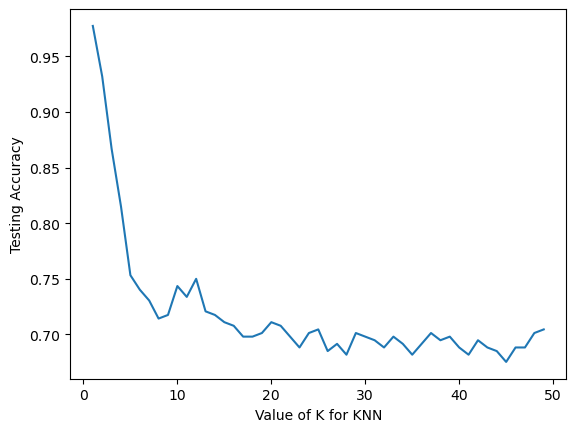

In [11]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

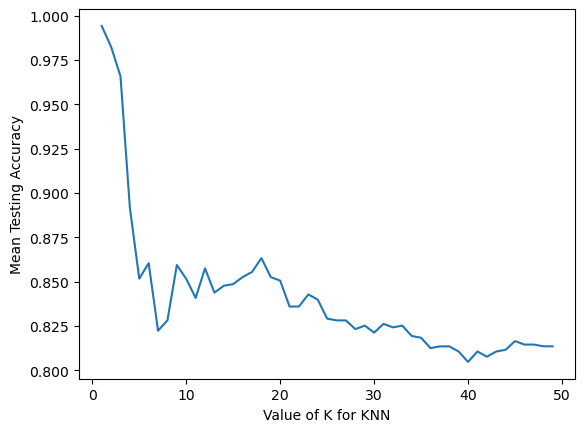

In [12]:
k_range = range(1, 50)
accuracy_scores = []

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_model[features_to_scale] = scaler.fit_transform(df_model[features_to_scale])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

# Iterate through different values of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Assuming you want to use 10-fold cross-validation
    scores = cross_val_score(knn, training_points, training_labels, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Testing Accuracy')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']


In [14]:
from sklearn.preprocessing import RobustScaler
#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']